In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [44]:
df=pd.read_csv("C:/Users/Abhi/Documents/Downloads/finalprocessed_data.csv")
print(df.shape)

(3653, 7)


In [46]:
df.head(10)

,Close_Price,Adjusted_Close_price,Tweets,Comp,Negative,Positive,Neutral
0,12469.97188,12469.97188,stick 06 somalia order islamist turn weapon te...,-0.9866,0.222,0.128,0.650
1,12472.24570,12472.24570,heart health vitamin prevent death heart disea...,-0.9792,0.157,0.111,0.732
2,12474.51953,12474.51953,google answer filling job algorithm germany da...,-0.9984,0.209,0.074,0.717
3,12480.69043,12480.69043,helping make shift combat commerce addendum in...,-0.9965,0.141,0.071,0.788
4,12398.00977,12398.00977,rise ethanol raise concern corn food new major...,-0.9914,0.160,0.106,0.734
5,12406.50326,12406.50326,status quo secretary general best buy circuit ...,-0.9648,0.174,0.125,0.701
6,12414.99674,12414.99674,common application typocom jumbo bonus dial en...,-0.9966,0.251,0.113,0.636
7,12423.49023,12423.49023,vw group sale rose sharply 2006 console sale b...,0.8955,0.114,0.134,0.752
8,12416.59961,12416.59961,claim hot leftover cool room temperature ill f...,-0.9967,0.151,0.079,0.770
9,12442.16016,12442.16016,love among ruin dell say plant tree help envir...,-0.9733,0.151,0.129,0.720


In [18]:
na_percentage=(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
print(na_percentage)

Neutral                 0.0
Positive                0.0
Negative                0.0
Comp                    0.0
Tweets                  0.0
Adjusted_Close_price    0.0
Close_Price             0.0
dtype: float64


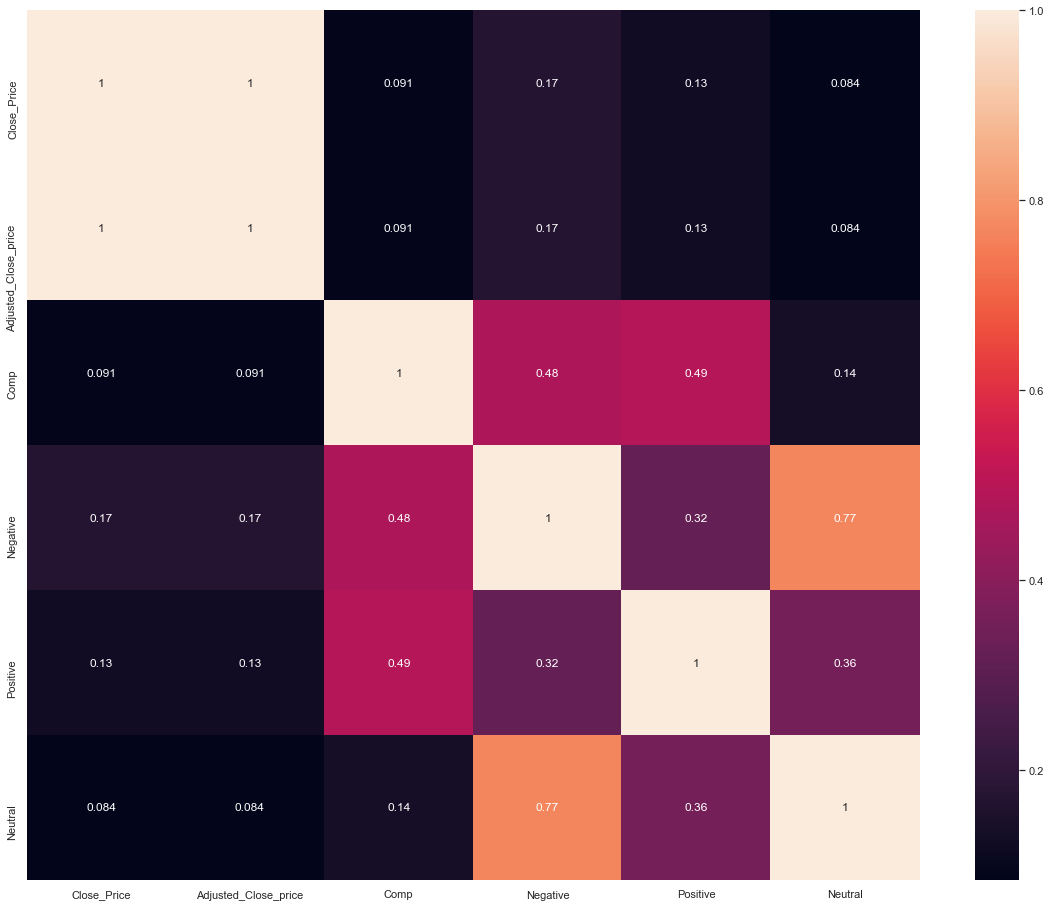

In [20]:
import seaborn as sns
corr=df.corr()
corr=np.abs(corr)
sns.set(rc={'figure.figsize':(20,16)})
hm=sns.heatmap(corr,annot=True)
hm

In [23]:
X=df['Comp']
y=df['Close_Price']

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_pred = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
X_train=np.array(X_train).reshape((-1,1))
y_train=np.array(y_train).reshape((-1,1))
X_test=np.array(X_test).reshape((-1,1))
y_pred=np.array(y_test).reshape((-1,1))

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
Rr=RandomForestRegressor()
Rr.fit(X_train, y_train)
Rr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


array([11717.77402298, 13931.3918256 , 12974.52456934, ...,
       14777.47847499, 15656.8234486 , 13813.76130101])

In [90]:
fname='C:/Users/Abhi/Documents/Downloads/stock_prediction'
pickle.dump(Rr,open(fname,'wb'))

In [91]:
model=pickle.load(open(fname,'rb'))
model.predict(X_test)

array([11717.77402298, 13931.3918256 , 12974.52456934, ...,
       14777.47847499, 15656.8234486 , 13813.76130101])